In [1]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np

from sp import root_base



In [7]:

def adjust(df):
    selection_cut = ((pl.col("eta").abs() < 10))

    df_update = df.filter(selection_cut)
    df_update = df_update.with_columns(
        pl.when(pl.col("n_wounded") == 0)
        .then(1)
        .otherwise(pl.col("n_wounded"))
        .alias("n_wounded")
    )

    info = f"Remove # of data {len(df) - len(df_update)} rows, {len(df_update)} rows remain."

    return df_update, info

df_dict = {
        "EPOS-LHC-R" : pl.read_parquet(f'{root_base}/pq/pO_EPOS-LHC-R_35000.parquet'),
        "DPMJET-III-19.3" : pl.read_parquet(f'{root_base}/pq/pO_DPMJET-III-19.3_35000.parquet'),
        "QGSJet-III" : pl.read_parquet(f'{root_base}/pq/pO_QGSJet-III_35000.parquet'),
    }

print(df_dict["EPOS-LHC-R"].select(pl.col("n_wounded").mean()))
print(df_dict["DPMJET-III-19.3"].select(pl.col("n_wounded").mean()))
print(df_dict["QGSJet-III"].select(pl.col("n_wounded").mean()))


shape: (1, 1)
┌───────────┐
│ n_wounded │
│ ---       │
│ f64       │
╞═══════════╡
│ 2.518958  │
└───────────┘
shape: (1, 1)
┌───────────┐
│ n_wounded │
│ ---       │
│ f64       │
╞═══════════╡
│ 3.624034  │
└───────────┘
shape: (1, 1)
┌───────────┐
│ n_wounded │
│ ---       │
│ f64       │
╞═══════════╡
│ 3.654312  │
└───────────┘


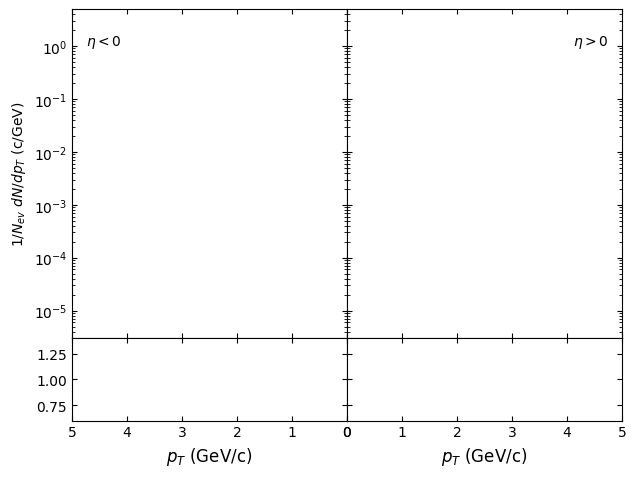

In [9]:
fig, axes = plt.subplots(2,2, gridspec_kw={"height_ratios":(4,1), "width_ratios":(1,1)})
# Remove ticks and labels
for ax in plt.gcf().get_axes():
    ax.label_outer()
plt.tight_layout()
# Log y axes for row 1
axes[0, 0].set_yscale("log")
axes[0, 1].set_yscale("log")
axes[1,0].set_xlim(5,0)
axes[1,1].set_xlim(0,5)
axes[1,0].set_ylim(0.6,1.4)
axes[1,1].set_ylim(0.6,1.4)
axes[0,0].set_ylim(3e-6,5)
axes[0,1].set_ylim(3e-6,5)
# Squeeze the plots
plt.subplots_adjust(hspace=-0.0, wspace=-0.0)
# Plot text in the upper left corner
axes[0, 0].text(0.05, 0.9, r"$\eta < 0$", ha="left", va="center", transform=axes[0, 0].transAxes)
axes[0, 1].text(0.95, 0.9, r"$\eta > 0$", ha="right", va="center", transform=axes[0, 1].transAxes)
# Use pt/(GeV/c) for x-axis title
axes[1, 0].set_xlabel(r"$p_T$ (GeV/c)", fontsize=12)
axes[1, 1].set_xlabel(r"$p_T$ (GeV/c)", fontsize=12)
# 1/Nev dN/dpt for yaxis
axes[0, 0].set_ylabel(r"$1/N_{ev}~dN/dp_T$ (c/GeV)")
# axes[0, 1].set_ylabel(r"$\frac{1}{N_{ev}} \frac{dN}{dp_T}$", fontsize=12)
# plt.tight_layout(rect=[0, 0, 1, 0.95])
# leave more marging on the left side
plt.subplots_adjust(left=0.1,bottom=0.1)
# Add ticks everywhere
for ax in plt.gcf().get_axes():
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
plt.savefig("test.pdf",dpi=200)

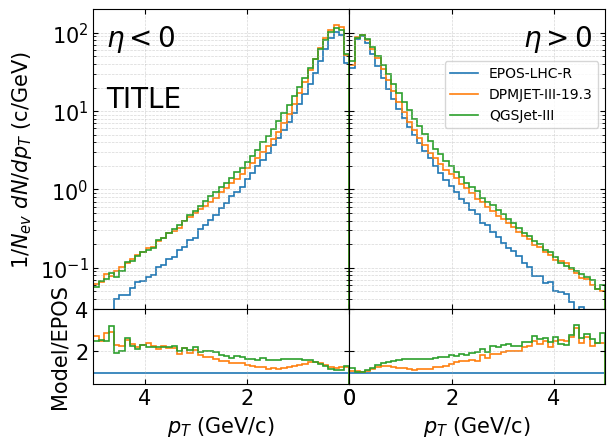

In [10]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt

def plot_pt_ratio(df_dict, 
                  eta_col="eta", 
                  pt_col="pt", 
                  ref_model="EPOS-LHC-R",
                  bins_pt=np.linspace(0,5,50), 
                  ratio_ylim=(0.5, 1.5),
                  main_ylim=(3e-6,5),
                  pre_selection = None,
                  title = None,
                  save_path="pt_ratio.pdf"):

    fig, axes = plt.subplots(2,2, gridspec_kw={"height_ratios":(4,1), "width_ratios":(1,1)})

    for ax in plt.gcf().get_axes():
        ax.label_outer()
        ax.grid(True, which="both", ls="--", lw=0.5, alpha=0.5)

    axes[0, 0].set_yscale("log")
    axes[0, 1].set_yscale("log")

    axes[0,0].set_xlim(5,0)
    axes[1,0].set_xlim(5,0)
    axes[0,1].set_xlim(0,5)
    axes[1,1].set_xlim(0,5)
    axes[1,0].set_ylim(*ratio_ylim)
    axes[1,1].set_ylim(*ratio_ylim)
    
    axes[0,0].set_ylim(*main_ylim)
    axes[0,1].set_ylim(*main_ylim)

    plt.subplots_adjust(hspace=-0.0, wspace=-0.0)

    axes[0, 0].text(0.05, 0.9, r"$\eta < 0$", ha="left", va="center", transform=axes[0, 0].transAxes, fontsize = 20)
    axes[0, 1].text(0.95, 0.9, r"$\eta > 0$", ha="right", va="center", transform=axes[0, 1].transAxes, fontsize = 20)

    axes[0, 0].set_ylabel(r"$1/N_{ev}~dN/dp_T$ (c/GeV)", fontsize = 15)
    axes[1, 0].set_xlabel(r"$p_T$ (GeV/c)", fontsize=15)
    axes[1, 0].set_ylabel(f"Model/EPOS", fontsize=15, ha='center')
    axes[1, 1].set_xlabel(r"$p_T$ (GeV/c)", fontsize=15)

    for ax in plt.gcf().get_axes():
        ax.tick_params(axis='both', which='both', direction='in', top=True, right=True, labelsize=15)

    # Reference model
    df_ref = df_dict[ref_model]
    df_ref = df_ref.filter(*pre_selection) if pre_selection else df_ref
    df_ref, _ = adjust(df_ref)
    Nev_ref = 35000 # n events

    pt_neg_ref = df_ref.filter(pl.col(eta_col) < 0)[pt_col].to_numpy()
    pt_pos_ref = df_ref.filter(pl.col(eta_col) > 0)[pt_col].to_numpy()

    counts_neg_ref, edges_neg_ref = np.histogram(pt_neg_ref, bins=bins_pt)
    counts_pos_ref, edges_pos_ref = np.histogram(pt_pos_ref, bins=bins_pt)

    bin_widths = np.diff(bins_pt)

    # Normalization
    counts_neg_ref = counts_neg_ref / (Nev_ref * bin_widths)
    counts_pos_ref = counts_pos_ref / (Nev_ref * bin_widths)

    # Other models
    for model, df in df_dict.items():

        # pre-selection
        df = df.filter(*pre_selection) if pre_selection else df
        df, _ = adjust(df)
        
        Nev = 35000
        pt_neg = df.filter(pl.col(eta_col) < 0)[pt_col].to_numpy()
        pt_pos = df.filter(pl.col(eta_col) > 0)[pt_col].to_numpy()

        counts_neg, _ = np.histogram(pt_neg, bins=bins_pt)
        counts_pos, _ = np.histogram(pt_pos, bins=bins_pt)

        counts_neg = counts_neg / (Nev * bin_widths)
        counts_pos = counts_pos / (Nev * bin_widths)

        axes[0,0].stairs(counts_neg, edges_neg_ref, fill=False, linewidth=1.2, label=model)
        axes[0,1].stairs(counts_pos, edges_pos_ref, fill=False, linewidth=1.2, label=model)

        ratio_neg = np.divide(counts_neg, counts_neg_ref, out=np.ones_like(counts_neg), where=counts_neg_ref!=0)
        ratio_pos = np.divide(counts_pos, counts_pos_ref, out=np.ones_like(counts_pos), where=counts_pos_ref!=0)

        axes[1,0].stairs(ratio_neg, edges_neg_ref, fill=False, linewidth=1.2, label=model)
        axes[1,1].stairs(ratio_pos, edges_pos_ref, fill=False, linewidth=1.2, label=model)

    axes[0,1].legend(loc="upper right", bbox_to_anchor=(1.0, 0.85), fontsize=10)
    axes[0,1].text(0.05, 0.7, title, ha="left", va="center",transform=axes[0,0].transAxes, fontsize=20)
    

    plt.subplots_adjust(left=0.1,bottom=0.1)
    plt.savefig(save_path, dpi=200, bbox_inches="tight") if save_path else None
    plt.show()

plot_pt_ratio(df_dict, 
              eta_col="eta", 
              pt_col="pt", 
              ref_model="EPOS-LHC-R",
              bins_pt=np.linspace(0,5,50), 
              ratio_ylim=(0.5, 4.0), 
                main_ylim=(3e-2,200),
                pre_selection=(pl.col("charge")!= 0,),
                save_path="pt_ratio.pdf",
                title="TITLE"
                )


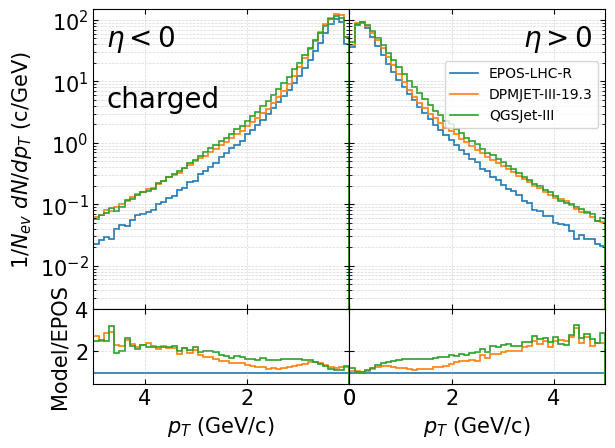

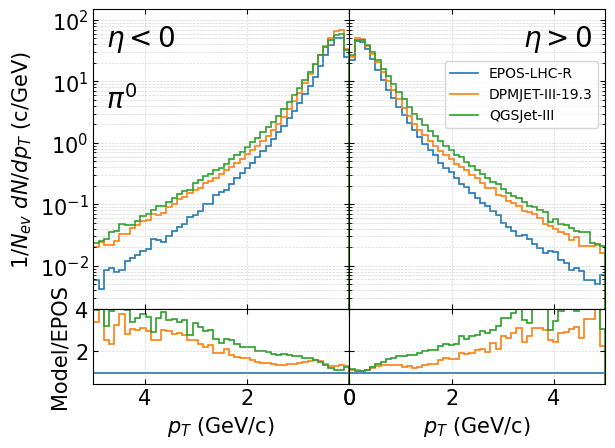

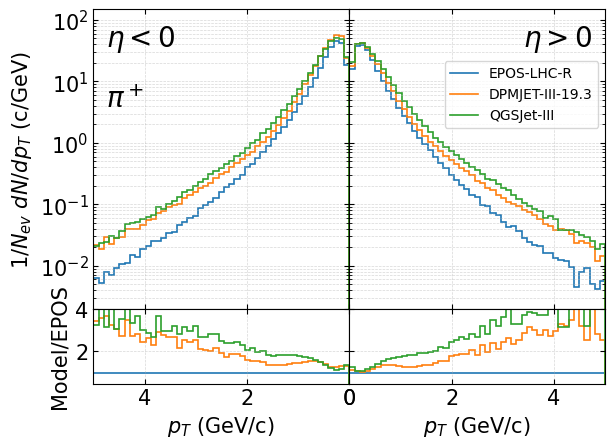

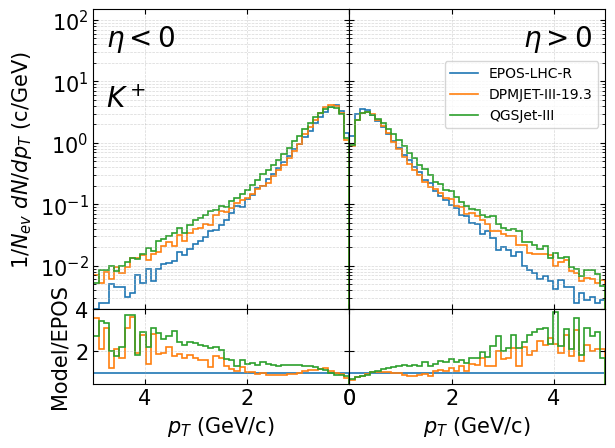

In [11]:
for pid in [(None, rf"charged", "charged", (pl.col("charge")!= 0,), (2e-3,150)), 
            (111, rf"$\pi^0$", "pi0", (pl.col('pid')==111,), (2e-3, 150)), 
            (211, rf"$\pi^+$", "piplus", (pl.col('pid')==211,), (2e-3, 150)), 
            (321, rf"$K^+$", "kplus", (pl.col('pid')==321,), (2e-3, 150))]:

  plot_pt_ratio(df_dict, 
                eta_col="eta", 
                pt_col="pt", 
                ref_model="EPOS-LHC-R",
                bins_pt=np.linspace(0,5,50), 
                ratio_ylim=(0.5, 4.0), 
                main_ylim=pid[4],
                title=f"{pid[1]}",
                # save_path=f"poster/pt_ratio_{pid[2]}.png",
                pre_selection=pid[3],
              )
